<img src="http://datamasters.co/logo/logo_DM_academy-horisontal.png" alt="DataMasters" width="300" height="300" align="left">

# REGRESSION

# Simple linear regression

### 1 scipy.stats.linregress
### Calculate a linear least-squares regression for two sets of measurements.

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
# Generate some data:
np.random.seed(1)
x = np.random.random(10)
y = 1.6*x + np.random.random(10)

In [3]:
# Create a data frame
df = pd.DataFrame({'y': y, 'x': list(x)}, columns=['y', 'x'])
df

y         x
0  1.086430  0.417022
1  1.837739  0.720324
2  0.204635  0.000114
3  1.361850  0.302333
4  0.262197  0.146756
5  0.818209  0.092339
6  0.715321  0.186260
7  1.111587  0.345561
8  0.775215  0.396767
9  1.060208  0.538817

In [4]:
# Create the model
# Don't go overboard with TEST TRAIN VALIDATION split, just for now
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f\n" % (slope, intercept))
print("Line equation: y = %f + %f * x"  % (intercept, slope))

slope: 1.862401    intercept: 0.337373

Line equation: y = 0.337373 + 1.862401 * x


In [6]:
# To get coefficient of determination (r_squared):
print("r-squared: %f" % r_value**2)

r-squared: 0.691050


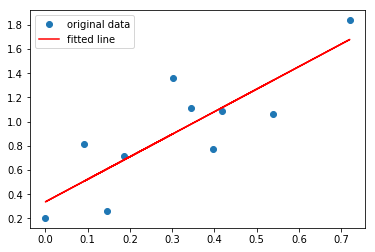

In [5]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

### 2 scikit learn

In [6]:
# same example, different library
from sklearn.linear_model import LinearRegression

In [8]:
x

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
       3.96767474e-01, 5.38816734e-01])

In [9]:
# Prepare data so that LinearRegression can fit a model
XX = np.array(x)
XX = XX.reshape(-1,1)
YY = np.array(y)
YY = YY.reshape(-1,1)

In [10]:
XX

array([[4.17022005e-01],
       [7.20324493e-01],
       [1.14374817e-04],
       [3.02332573e-01],
       [1.46755891e-01],
       [9.23385948e-02],
       [1.86260211e-01],
       [3.45560727e-01],
       [3.96767474e-01],
       [5.38816734e-01]])

In [11]:
# fit the model
reg = LinearRegression().fit(XX, YY)

Get the parameters

In [12]:
reg.coef_

array([[1.86240088]])

In [12]:
reg.score(XX, YY)

0.6910502281706479

In [13]:
reg.intercept_

array([0.33737318])

##### EXAMPLE FROM SLIDES

In [14]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
dataset_train = pd.read_csv('./data/kc_house_train_data.csv', dtype=dtype_dict)
dataset_test = pd.read_csv('./data/kc_house_test_data.csv', dtype=dtype_dict)

In [15]:
dataset_train.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0       3.0       1.00       1180.0   
1  6414100192  20141209T000000  538000.0       3.0       2.25       2570.0   
2  5631500400  20150225T000000  180000.0       2.0       1.00        770.0   
3  2487200875  20141209T000000  604000.0       4.0       3.00       1960.0   
4  1954400510  20150218T000000  510000.0       3.0       2.00       1680.0   

   sqft_lot floors  waterfront  view     ...      grade  sqft_above  \
0      5650      1           0     0     ...          7        1180   
1      7242      2           0     0     ...          7        2170   
2     10000      1           0     0     ...          6         770   
3      5000      1           0     0     ...          7        1050   
4      8080      1           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0         1340.0      5650.0  
1         1690.0      7639.0  
2         2720.0      8062.0  
3         1360.0      5000.0  
4         1800.0      7503.0  

[5 rows x 21 columns]

In [16]:
dataset_test.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  0114101516  20140528T000000  310000.0       3.0        1.0       1430.0   
1  9297300055  20150124T000000  650000.0       4.0        3.0       2950.0   
2  1202000200  20141103T000000  233000.0       3.0        2.0       1710.0   
3  8562750320  20141110T000000  580500.0       3.0        2.5       2320.0   
4  7589200193  20141110T000000  535000.0       3.0        1.0       1090.0   

   sqft_lot floors  waterfront  view     ...      grade  sqft_above  \
0     19901    1.5           0     0     ...          7        1430   
1      5000      2           0     3     ...          9        1980   
2      4697    1.5           0     0     ...          6        1710   
3      3980      2           0     0     ...          8        2320   
4      3000    1.5           0     0     ...          8        1090   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1927             0    98028  47.7558 -122.229   
1            970      1979             0    98126  47.5714 -122.375   
2              0      1941             0    98002  47.3048 -122.218   
3              0      2003             0    98027  47.5391 -122.070   
4              0      1929             0    98117  47.6889 -122.375   

   sqft_living15  sqft_lot15  
0         1780.0     12697.0  
1         2140.0      4000.0  
2         1030.0      4705.0  
3         2580.0      3980.0  
4         1570.0      5080.0  

[5 rows x 21 columns]

In [15]:
print("Train set: %5d rows and %d columns\n Test set: %5d rows and %d columns" % (dataset_train.shape[0], dataset_train.shape[1], dataset_test.shape[0], dataset_test.shape[1]))

Train set: 17384 rows and 21 columns
 Test set:  4229 rows and 21 columns


In [16]:
dataset_train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


def simpleRegression(input_feature_train, output):
    lm.fit(np.array(input_feature_train).reshape(-1,1), np.array(output).reshape(-1,1))
    return (lm.intercept_[0], lm.coef_[0,0])

In [18]:
 squarefeet_intercept, squarfeet_slope = simpleRegression(dataset_train.sqft_living, dataset_train.price)

In [19]:
squarfeet_slope

281.95883963034237

In [20]:
squarefeet_intercept

-47116.07907289371

In [23]:
def get_regression_predictions(input_feature, lm=lm):
    return lm.predict(np.array(input_feature).reshape(-1,1))

In [24]:
predictions_test_set = get_regression_predictions(dataset_test.sqft_living)

In [14]:
predictions_test_set.shape

(4229, 1)

In [15]:
from sklearn import metrics

In [16]:
print('MSE - Test:', metrics.mean_squared_error(predictions_test_set, dataset_test.price))

MSE - Test: 65122471888.81819


In [17]:
predictions_test_set[0:5]

array([[356085.0615985 ],
       [784662.49783662],
       [435033.53669499],
       [607028.4288695 ],
       [260219.05612418]])

In [18]:
dataset_test.price.head()

0    310000.0
1    650000.0
2    233000.0
3    580500.0
4    535000.0
Name: price, dtype: float64

Using your Slope and Intercept, what is the predicted price for a house with 2650 sqft?

In [19]:
predict_single_price = lambda x: squarefeet_intercept + squarfeet_slope * x

In [20]:
predict_single_price(2650)

700074.8459475136

In [21]:
print('MSE - Train:', metrics.mean_squared_error(get_regression_predictions(dataset_train.sqft_living), dataset_train.price))

MSE - Train: 69139343889.62743


In [22]:
def getEstimatedInput(output, intercept, slope):
        return (output-intercept) / slope

In [23]:
getEstimatedInput(800000, squarefeet_intercept, squarfeet_slope)

3004.396245152277

In [24]:
bedroom_slope, bedroom_intercept = simpleRegression(dataset_train.bedrooms, dataset_train.price)

In [25]:
print('MSE - Train Bedroom: ', metrics.mean_squared_error(get_regression_predictions(dataset_train.bedrooms), dataset_train.price))

MSE - Train Bedroom:  123288339747.00755


================================== SIMPLE LINEAR REGRESSION END ====================================================

# Polynomial Regression

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

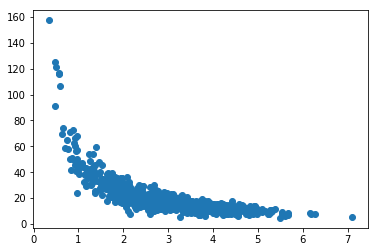

In [21]:
%matplotlib inline
from pylab import *
import numpy as np

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount);

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [25]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))

Please refer to:
>numpy.polyfit

Please refer to:
>numpy.poly1d

In [26]:
np.poly1d(np.polyfit(x, y, 4))

poly1d([   0.54005597,   -8.85641318,   52.25378374, -135.34422815,
        147.6050662 ])

We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

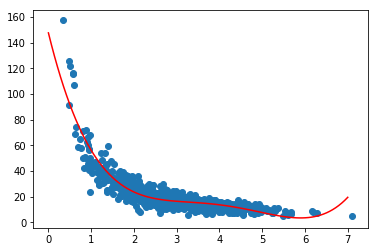

In [27]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show();

Looks pretty good! Let's measure the r-squared error:

In [28]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)

0.8293766396303073


Do you start to see overfitting, even though the r-squared score looks good for this particular data set?

In [30]:
def polynomial(n):
    pol = np.poly1d(np.polyfit(x, y, n))
    plt.scatter(x, y)
    plt.plot(xp, pol(xp), c='r')
    plt.show()
    print('r2 score: ', r2_score(y, pol(x)))

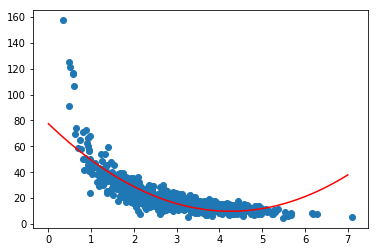

r2 score:  0.6927446350535892


In [41]:
polynomial(2)

================================== POLYNOMIAL REGRESSION END ===========================================================

# Multivariate Regression

In [42]:
# pandas.read_excel
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

In [43]:
df.head()

Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324    19832  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise  Sound  Leather  
0      4       1      1        1  
1      4       1      1        0  
2      4       1      1        0  
3      4       1      0        0  
4      4       1      0        1

### 3 statsmodels

In [44]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# instantiate an object from StandardScaler class
scale = StandardScaler()

The standard score of a sample x is calculated as:

z = (x - u) / s
where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

In [45]:
X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

In [46]:
X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].as_matrix())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for l

In [47]:
X.head()

Mileage  Cylinder     Doors
0 -1.417485   0.52741  0.556279
1 -1.305902   0.52741  0.556279
2 -0.810128   0.52741  0.556279
3 -0.426058   0.52741  0.556279
4  0.000008   0.52741  0.556279

In [48]:
est = sm.OLS(y, X).fit()

In [49]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     18.11
Date:                Sat, 08 Jun 2019   Prob (F-statistic):           2.23e-11
Time:                        12:17:27   Log-Likelihood:                -9207.1
No. Observations:                 804   AIC:                         1.842e+04
Df Residuals:                     801   BIC:                         1.843e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
Cylinder    5587.4472    804.509      6.945      0.000    4008.252    7166.642
Doors      -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sometimes, we can use the mean() function to "get a feeling" about the most important predictor

In [50]:
# use the groupby() function to evaluate the mean value of price, per cylinder type
df.groupby(df.Cylinder).mean()['Price']

Cylinder
4    17862.564874
6    20081.395841
8    38968.043180
Name: Price, dtype: float64

In [50]:
# do the same, only use doors variable this time
df.groupby(df.Doors).mean()['Price']

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

Hey, let's give one more look into our data.<br>
Do you notice anything strange in the normal equation?!?

In [52]:
# notice that the free coeficient is missing
X.head()

Mileage  Cylinder     Doors
0 -1.417485   0.52741  0.556279
1 -1.305902   0.52741  0.556279
2 -0.810128   0.52741  0.556279
3 -0.426058   0.52741  0.556279
4  0.000008   0.52741  0.556279

In [51]:
X = sm.add_constant(X)

In [54]:
X.head()

const   Mileage  Cylinder     Doors
0    1.0 -1.417485   0.52741  0.556279
1    1.0 -1.305902   0.52741  0.556279
2    1.0 -0.810128   0.52741  0.556279
3    1.0 -0.426058   0.52741  0.556279
4    1.0  0.000008   0.52741  0.556279

In [52]:
est_intercept = sm.OLS(y, X).fit()

In [53]:
est_intercept.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     150.0
Date:                Sat, 08 Jun 2019   Prob (F-statistic):           3.95e-77
Time:                        12:23:13   Log-Likelihood:                -8356.7
No. Observations:                 804   AIC:                         1.672e+04
Df Residuals:                     800   BIC:                         1.674e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.134e+04    279.405     76.388      0.000    2.08e+04    2.19e+04
Mileage    -1272.3412    279.567     -4.551      0.000   -1821.112    -723.571
Cylinder    5587.4472    279.527     19.989      0.000    5038.754    6136.140
Doors      -1404.5513    279.446     -5.026      0.000   -1953.085    -856.018
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What did adding the incercept do to the model?
Pay attention to t and p values!

======= class 1 of Regression ends here ======================================================================================

##### USE UTILS FOR REGRESSION FILE HERE

In [1]:
from data import Utils_Regression as reg

In [55]:
import numpy as np
X = np.array([0, 1, 2, 3, 4])
Y = np.array([1, 3, 7, 13, 21])
theta = np.random.randn(2,1)
XX=np.array([[1,0], [1,1], [1,2], [1,3], [1,4]])

# =============================================================================
# 
# X     Y
# 0     1
# 1     3
# 2     7
# 3     13
# 4     21
# =============================================================================

The line that fits the dots is: -1.00 + 5.00 * X
OLS_by_hand running time: 0:00:00.011969


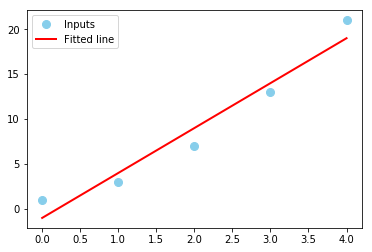

In [56]:
reg.OLS_by_hand(X, Y)

In [57]:
reg.OLS_skLearn(X, Y)

The line that fits the dots is: -1.00 + 5.00 * X
OLS_skLearn running time: 0:00:00.000998


In [65]:
theta, cost_h, theta_h, df = reg.gradient_descent(XX,Y.reshape(-1,1), theta, learning_rate=0.1, iterations=200)

gradient_descent running time: 0:00:00.004018


In [66]:
df.tail()

intercept  slope
195       -1.0    5.0
196       -1.0    5.0
197       -1.0    5.0
198       -1.0    5.0
199       -1.0    5.0

======================================================================================================================

# THE NEXT MATERIAL IS FOR LESSON 2

### Multivariate Regression Example with Python (with EDA)

#### Leave this for lesson 2 of Regression

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

'Avg. Area Income': Avg. Income of residents of the city house is located in.
'Avg. Area House Age': Avg Age of Houses in same city
'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
'Area Population': Population of city house is located in
'Price': Price that the house sold at
'Address': Address for the house

**Let's get started!**
#### Check out the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!
#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
USAhousing = pd.read_csv('./data/USA_Housing.csv')

In [6]:
USAhousing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [7]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [8]:
USAhousing.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

**Did you notice that 'Address' column is left out from describe() function?<br>
This function can not analyse string columns!**

In [9]:
# if we ever need to reference the column names:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

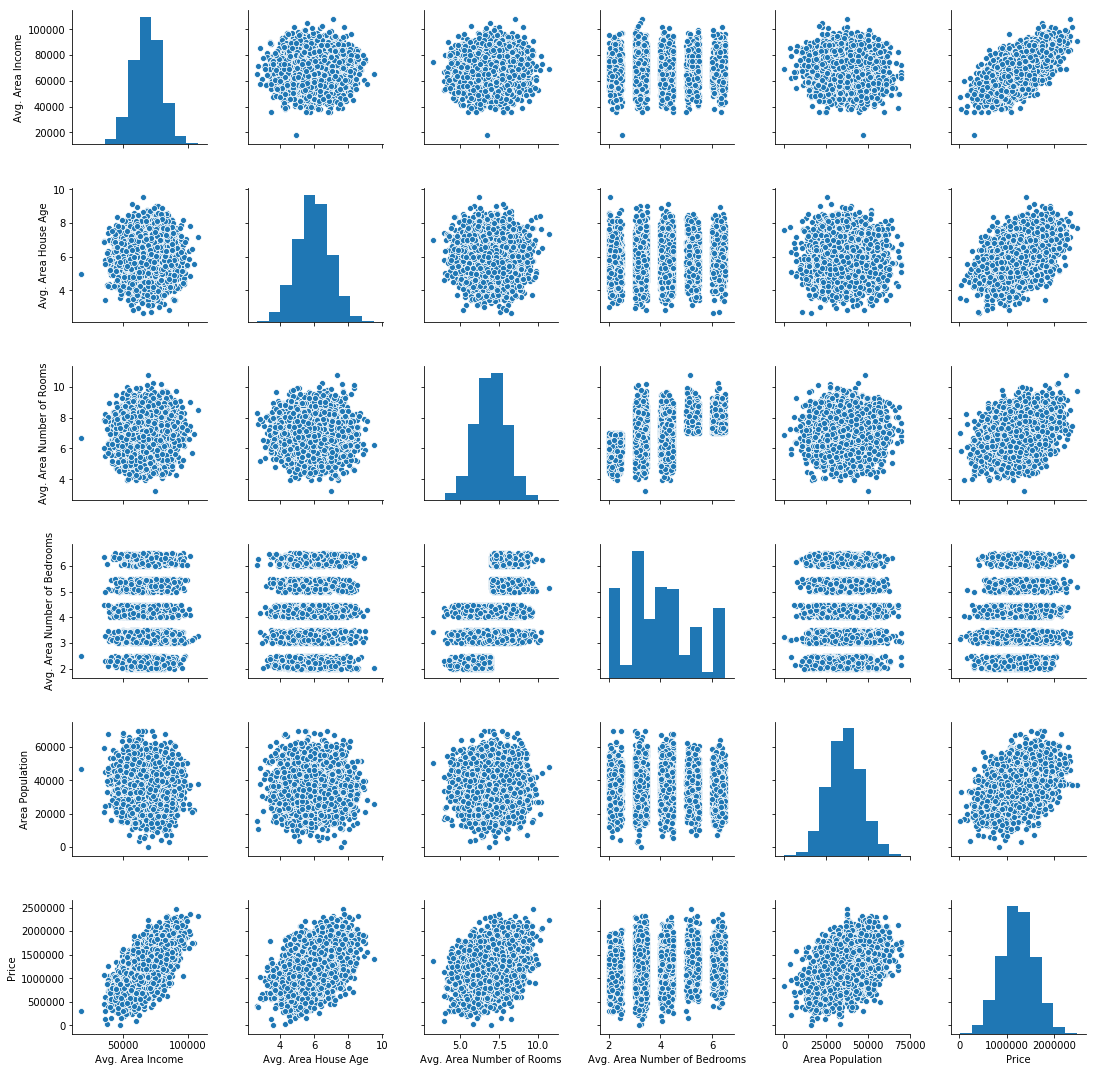

In [11]:
# pairplot is a cool way to get a first insights of the data
# this functon is normaly recomended for small to medium sized data sets
# the output of the function is Histogram plots and Correlation plots
sns.pairplot(USAhousing);

Is the data normaly distributed?

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


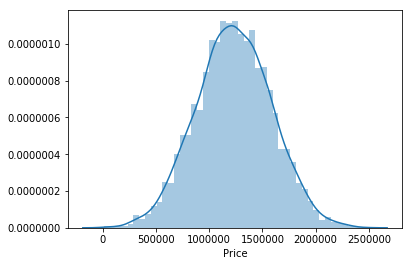

In [12]:
# distribution of Price column
sns.distplot(USAhousing['Price']);

In [23]:
# Perform a formal test:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.stattools import jarque_bera as jb

stats.jarque_bera(USAhousing['Price'])

(0.6609562423229162, 0.7185800829413304)

In [24]:
jb(USAhousing['Price'])

(0.6609562423228953,
 0.7185800829413378,
 -0.0027172494461181885,
 2.9439370337482917)

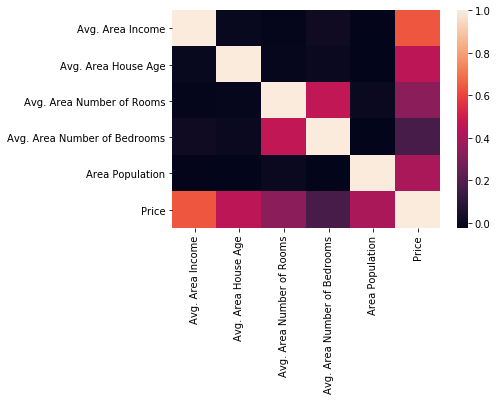

In [26]:
# we almost always want to create a heat map for the correlation between the data
sns.heatmap(USAhousing.corr());

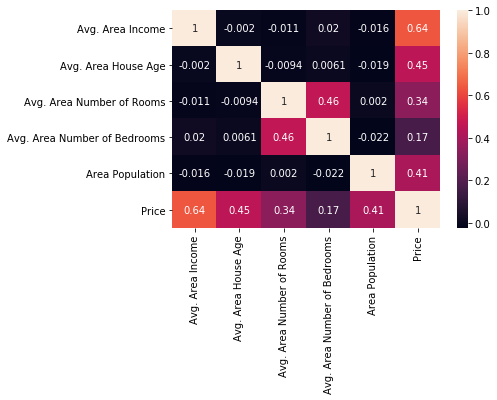

In [27]:
sns.heatmap(USAhousing.corr(), annot=True);

----- END of EDA --------------------------------------------------------

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [28]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [30]:
# check out the frames' size
# shape returs (num. of rows, num. of columns)
print ('USAhousing shape: ', USAhousing.shape)
print ('X_train shape: ', X_train.shape)
print ('X_test shape: ', X_test.shape)
print ('Y_train shape: ', y_train.shape)
print ('Y_test shape: ', y_test.shape)


USAhousing shape:  (5000, 7)
X_train shape:  (3000, 5)
X_test shape:  (2000, 5)
Y_train shape:  (3000,)
Y_test shape:  (2000,)


## Creating and Training the Model

In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train);

In [48]:
import statsmodels.api as sm
X_train_SM = sm.add_constant(X_train)
lm_sm = sm.OLS(y_train, X_train_SM).fit()
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     6715.
Date:                Sun, 09 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:35:24   Log-Likelihood:                -38807.
No. Observations:                3000   AIC:                         7.763e+04
Df Residuals:                    2994   BIC:                         7.766e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -2.64e+06   2.22e+04   -119.047      0.000   -2.68e+06    -2.6e+06
Avg. Area Income                21.5283      0.174    124.039      0.000      21.188      21.869
Avg. Area House Age           1.649e+05   1883.872     87.524      0.000    1.61e+05    1.69e+05
Avg. Area Number of Rooms     1.224e+05   2082.358     58.764      0.000    1.18e+05    1.26e+05
Avg. Area Number of Bedrooms  2233.8019   1683.015      1.327      0.185   -1066.181    5533.785
Area Population                 15.1504      0.184     82.391      0.000      14.790      15.511
==============================================================================
Omnibus:                        5.294   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.579
Skew:                           0.016   Prob(JB):                        0.101
Kurtosis:                       2.811   Cond. No.                     9.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [36]:
# print the intercept
print(lm.intercept_)

-2640159.796851911


In [37]:
# coefficients are displayed in a list, we use the list to create a data frame, only to gain a better visual
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because I made up this data.

**what if the scale of the data is LOG level?**


## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

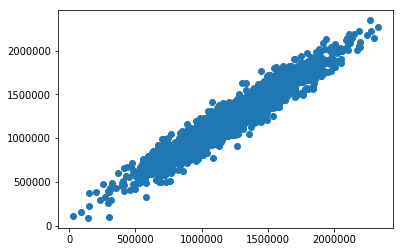

In [39]:
# method for predicting: predict()
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions);

In [40]:
jb(y_test - predictions)

(0.9246681152951243,
 0.6298119113107234,
 0.003191282455019583,
 2.8948559072096267)

**Residual Histogram**<br>
Here we take a break from this example, to dive into some serious statistics <br>
[Go to presentation, Error Analysis]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


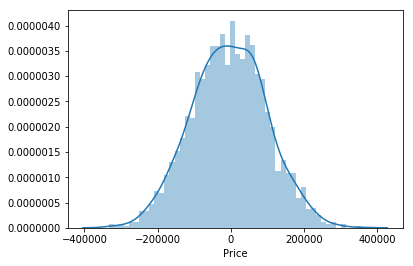

In [41]:
sns.distplot((y_test-predictions),bins=50);

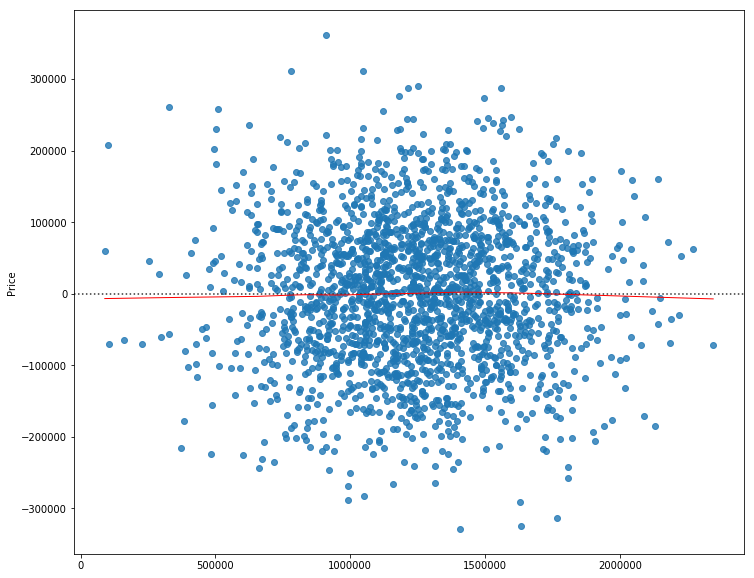

In [66]:
sns.residplot(predictions, y_test, lowess=True, line_kws={'color':'r', 'lw':1});

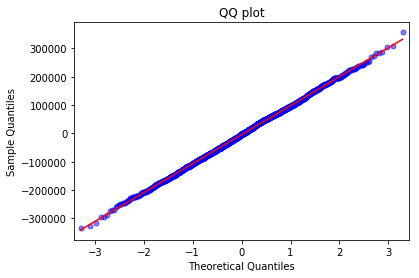

In [43]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(y_test-predictions)
fig = QQ.qqplot(alpha=0.5, markersize=5, line='s')
plt.title('QQ plot');

**statsmodels.stats.diagnostic.het_white**<br>
Returns:
<ul>
    <li>lm (float) – lagrange multiplier statistic</li>
<li>lm_pvalue (float) – p-value of lagrange multiplier test</li>
<li>fvalue (float) – f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test.</li>
<li>f_pvalue (float) – p-value for the f-statistic</li>
    </ul>

In [46]:
from statsmodels.stats.diagnostic import het_white as WhitesTest
from statsmodels.compat.numpy import np_matrix_rank
import statsmodels.api as sm

X_test = sm.add_constant(X_test)
WhitesTest(y_test-predictions, X_test)

(26.147833066545225, 0.160984732743348, 1.3108013483878524, 0.1605245775841883)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [47]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914957
MSE: 10460958907.209507
RMSE: 102278.82922291156


In [49]:
# RSE
print('RSE:',  np.sqrt((X_train.shape[0]*metrics.mean_squared_error(y_test, predictions)) / (X_train.shape[0] - X_train.shape[1] -1)))

RSE: 102381.26172652365


# RIDGE

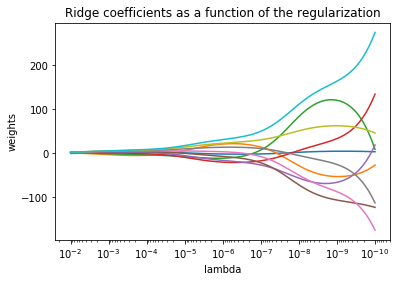

In [55]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# LASSO

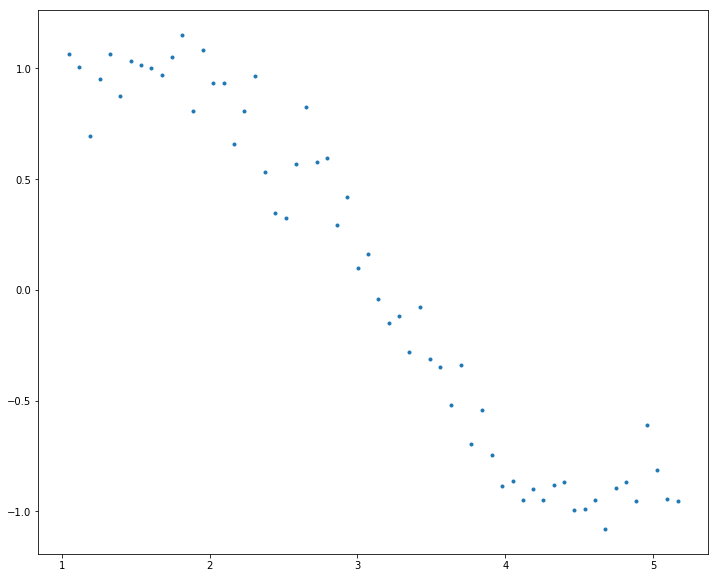

In [59]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.');

In [61]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5.258479  
2  11.000386  13.055521  
3  24.487142  30.771450  
4  52.200353  69.241170

In [62]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


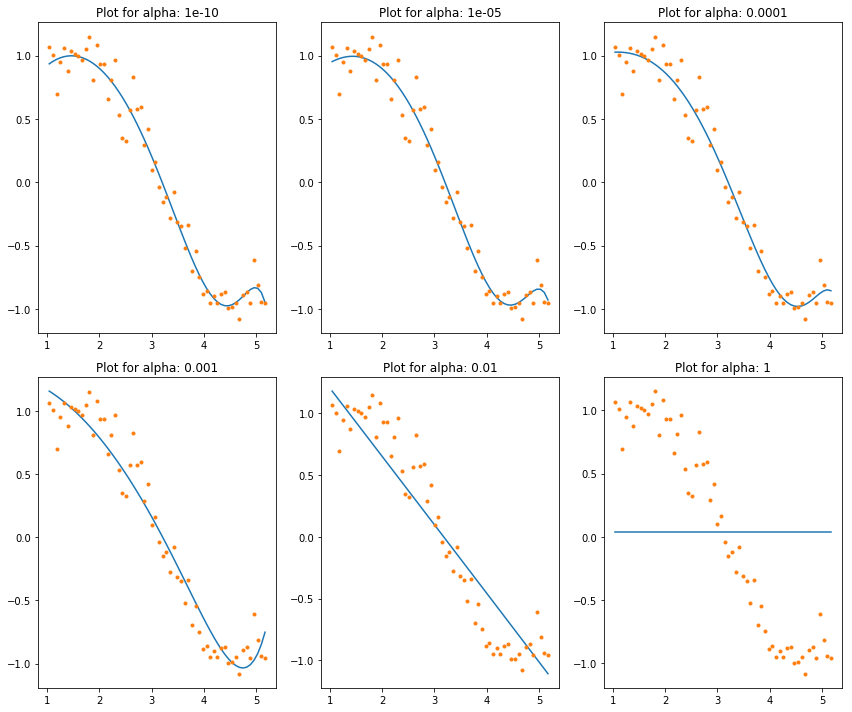

In [63]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [64]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      8
alpha_0.0001    10
alpha_0.001     12
alpha_0.01      13
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64

In [65]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

rss intercept coef_x_1 coef_x_2 coef_x_3 coef_x_4 coef_x_5  \
alpha_1e-15  0.96      0.22      1.1    -0.37  0.00089   0.0016 -0.00012   
alpha_1e-10  0.96      0.22      1.1    -0.37  0.00088   0.0016 -0.00012   
alpha_1e-08  0.96      0.22      1.1    -0.37  0.00077   0.0016 -0.00011   
alpha_1e-05  0.96       0.5      0.6    -0.13   -0.038       -0        0   
alpha_0.0001    1       0.9     0.17       -0   -0.048       -0       -0   
alpha_0.001   1.7       1.3       -0    -0.13       -0       -0       -0   
alpha_0.01    3.6       1.8    -0.55 -0.00056       -0       -0       -0   
alpha_1        37     0.038       -0       -0       -0       -0       -0   
alpha_5        37     0.038       -0       -0       -0       -0       -0   
alpha_10       37     0.038       -0       -0       -0       -0       -0   

             coef_x_6 coef_x_7 coef_x_8 coef_x_9 coef_x_10 coef_x_11  \
alpha_1e-15  -6.4e-05 -6.3e-06  1.4e-06  7.8e-07   2.1e-07     4e-08   
alpha_1e-10  -6.4e-05 -6.3e-06  1.4e-06  7.8e-07   2.1e-07     4e-08   
alpha_1e-08  -6.4e-05 -6.3e-06  1.4e-06  7.8e-07   2.1e-07     4e-08   
alpha_1e-05         0        0  7.7e-06    1e-06   7.7e-08         0   
alpha_0.0001        0        0  9.5e-06  5.1e-07         0         0   
alpha_0.001         0        0        0        0         0   1.5e-08   
alpha_0.01         -0       -0       -0       -0         0         0   
alpha_1            -0       -0       -0       -0        -0        -0   
alpha_5            -0       -0       -0       -0        -0        -0   
alpha_10           -0       -0       -0       -0        -0        -0   

             coef_x_12 coef_x_13 coef_x_14 coef_x_15  
alpha_1e-15    5.4e-09   1.8e-10    -2e-10  -9.2e-11  
alpha_1e-10    5.4e-09   1.8e-10    -2e-10  -9.2e-11  
alpha_1e-08    5.3e-09     2e-10  -1.9e-10  -9.3e-11  
alpha_1e-05          0         0        -0    -7e-11  
alpha_0.0001         0        -0        -0  -4.4e-11  
alpha_0.001    7.5e-10         0         0         0  
alpha_0.01           0         0         0         0  
alpha_1             -0        -0        -0        -0  
alpha_5             -0        -0        -0        -0  
alpha_10            -0        -0        -0        -0

## Great Job!

<img src="http://datamasters.co/logo/logo_DM_academy-horisontal.png" alt="DataMasters" width="300" height="300" align="left">